In [1]:
import xarray as xr
import intake
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cat = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

In [3]:
 query = dict(
    variable_id=['tas'],
    table_id='Amon',
    experiment_id=['historical'],
    grid_label='gn',
    member_id='r1i1p1f1'
)

cat_subset = cat.search(require_all_on=["source_id"], **query)

In [4]:
cat_subset.df.groupby("source_id")[
    ["experiment_id", "variable_id", "table_id"]
].nunique()

,experiment_id,variable_id,table_id
source_id,,,
ACCESS-CM2,1,1,1
ACCESS-ESM1-5,1,1,1
AWI-CM-1-1-MR,1,1,1
AWI-ESM-1-1-LR,1,1,1
BCC-CSM2-MR,1,1,1
BCC-ESM1,1,1,1
CAMS-CSM1-0,1,1,1
CAS-ESM2-0,1,1,1
CESM2,1,1,1


In [5]:
dsets = cat_subset.to_dataset_dict(
    zarr_kwargs={'consolidated': True},
    storage_options={'token': 'anon'}
)
list(dsets)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


['CMIP.MPI-M.ICON-ESM-LR.historical.Amon.gn',
 'CMIP.BCC.BCC-ESM1.historical.Amon.gn',
 'CMIP.CSIRO-ARCCSS.ACCESS-CM2.historical.Amon.gn',
 'CMIP.CAS.FGOALS-g3.historical.Amon.gn',
 'CMIP.MPI-M.MPI-ESM1-2-LR.historical.Amon.gn',
 'CMIP.MRI.MRI-ESM2-0.historical.Amon.gn',
 'CMIP.NCAR.CESM2-FV2.historical.Amon.gn',
 'CMIP.NASA-GISS.GISS-E2-1-H.historical.Amon.gn',
 'CMIP.BCC.BCC-CSM2-MR.historical.Amon.gn',
 'CMIP.MPI-M.MPI-ESM1-2-HR.historical.Amon.gn',
 'CMIP.NCAR.CESM2-WACCM.historical.Amon.gn',
 'CMIP.NASA-GISS.GISS-E2-1-G.historical.Amon.gn',
 'CMIP.NCC.NorESM2-MM.historical.Amon.gn',
 'CMIP.CSIRO.ACCESS-ESM1-5.historical.Amon.gn',
 'CMIP.AWI.AWI-ESM-1-1-LR.historical.Amon.gn',
 'CMIP.CCCR-IITM.IITM-ESM.historical.Amon.gn',
 'CMIP.NCAR.CESM2.historical.Amon.gn',
 'CMIP.CAS.CAS-ESM2-0.historical.Amon.gn',
 'CMIP.CAMS.CAMS-CSM1-0.historical.Amon.gn',
 'CMIP.CCCma.CanESM5.historical.Amon.gn',
 'CMIP.CMCC.CMCC-CM2-SR5.historical.Amon.gn',
 'CMIP.NCAR.CESM2-WACCM-FV2.historical.Amon.gn',

In [6]:
dsiter = iter(dsets)
current_model = next(dsiter)
dsets[current_model]["tas"]

<xarray.DataArray 'tas' (member_id: 1, dcpp_init_year: 1, time: 1980, i: 20480)> Size: 162MB
dask.array<getitem, shape=(1, 1, 1980, 20480), dtype=float32, chunksize=(1, 1, 896, 20480), chunktype=numpy.ndarray>
Coordinates:
    height          float64 8B ...
  * i               (i) int32 82kB 0 1 2 3 4 5 ... 20475 20476 20477 20478 20479
    latitude        (i) float64 164kB dask.array<chunksize=(20480,), meta=np.ndarray>
    longitude       (i) float64 164kB dask.array<chunksize=(20480,), meta=np.ndarray>
  * time            (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-1...
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    history:        2021-08-05T01:02:00Z altered by CMOR: Treated scalar dime...
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

In [13]:
dsiter = iter(dsets)

n = 36
for i in range(n):#37
    current_model = next(dsiter)
    #print(str.join("-",current_model.split(".")[1:3]))
    print(current_model)

CMIP.MPI-M.ICON-ESM-LR.historical.Amon.gn
CMIP.BCC.BCC-ESM1.historical.Amon.gn
CMIP.CSIRO-ARCCSS.ACCESS-CM2.historical.Amon.gn
CMIP.CAS.FGOALS-g3.historical.Amon.gn
CMIP.MPI-M.MPI-ESM1-2-LR.historical.Amon.gn
CMIP.MRI.MRI-ESM2-0.historical.Amon.gn
CMIP.NCAR.CESM2-FV2.historical.Amon.gn
CMIP.NASA-GISS.GISS-E2-1-H.historical.Amon.gn
CMIP.BCC.BCC-CSM2-MR.historical.Amon.gn
CMIP.MPI-M.MPI-ESM1-2-HR.historical.Amon.gn
CMIP.NCAR.CESM2-WACCM.historical.Amon.gn
CMIP.NASA-GISS.GISS-E2-1-G.historical.Amon.gn
CMIP.NCC.NorESM2-MM.historical.Amon.gn
CMIP.CSIRO.ACCESS-ESM1-5.historical.Amon.gn
CMIP.AWI.AWI-ESM-1-1-LR.historical.Amon.gn
CMIP.CCCR-IITM.IITM-ESM.historical.Amon.gn
CMIP.NCAR.CESM2.historical.Amon.gn
CMIP.CAS.CAS-ESM2-0.historical.Amon.gn
CMIP.CAMS.CAMS-CSM1-0.historical.Amon.gn
CMIP.CCCma.CanESM5.historical.Amon.gn
CMIP.CMCC.CMCC-CM2-SR5.historical.Amon.gn
CMIP.NCAR.CESM2-WACCM-FV2.historical.Amon.gn
CMIP.CMCC.CMCC-ESM2.historical.Amon.gn
CMIP.CMCC.CMCC-CM2-HR4.historical.Amon.gn
CMIP.S

In [ ]:
dsiter = iter(dsets)
#next(dsiter)

#current_model = next(dsiter)
n = 36

times_mean = np.arange(1850,2024,1)         #timesstamps for model mean
model_mean = np.zeros(times_mean.size)      #variable for the mean of the model
model_mean_diff = np.zeros(times_mean.size) #variable for mean anomaly
meancount = np.zeros(times_mean.size)       #count of how many models contribute to the mean(at borders only like 2 models contribute so we cannot divide by n)
maxsize = 0
model_temps = []
for i in range(n):#36
    current_model = next(dsiter)
    curr_ds = dsets[current_model]
    curr_ds = curr_ds.sortby("time")

    #datasets use different variable names for their spacial data we want to average over
    if "lat" in dsets[current_model].coords:
        CMIP_mean_temps = curr_ds["tas"].mean(dim=['lat', 'lon']).resample(time="YE").mean().values.ravel()
    elif "i" in dsets[current_model].coords:
        CMIP_mean_temps = curr_ds["tas"].mean("i").resample(time="YE").mean().values.ravel()
    else:
        CMIP_mean_temps = curr_ds["tas"].mean(dim=['latitude', 'longitude']).resample(time="YE").mean().values.ravel()
    
    m1850_1900 = CMIP_mean_temps[:50].mean()

    times = curr_ds.resample(time="YE").mean()["time"].values.astype('datetime64[Y]')
    label = str.join("-",current_model.split(".")[1:3])

    #calculate the effect on mean of models
    if CMIP_mean_temps.size>maxsize:
        maxsize=CMIP_mean_temps.size
        mtimes=times
    meancount[:CMIP_mean_temps.size]+=1
    model_mean[:CMIP_mean_temps.size] +=+CMIP_mean_temps
    model_mean_diff[:CMIP_mean_temps.size] +=+CMIP_mean_temps-m1850_1900

    model_temps.append([times,CMIP_mean_temps,m1850_1900,label])

times_mean = times_mean[:maxsize]
model_mean = model_mean[:maxsize]/meancount[:maxsize]
model_mean_diff = model_mean_diff[:maxsize]/meancount[:maxsize]
mmm1850_1900 = model_mean[:50].mean()


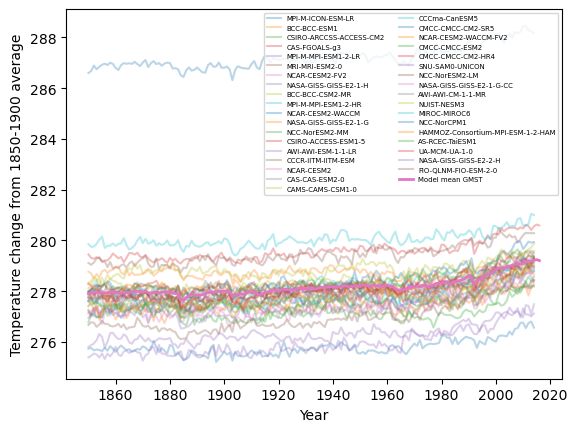

In [10]:
for model in model_temps:
    plt.plot(model[0],model[1],label=model[3],alpha=0.3)

plt.plot(mtimes,model_mean_diff+mmm1850_1900,label="Model mean GMST",linewidth=2)
plt.ylabel("Temperature change from 1850-1900 average")
plt.xlabel("Year")
plt.legend(ncol=2,fontsize=5)

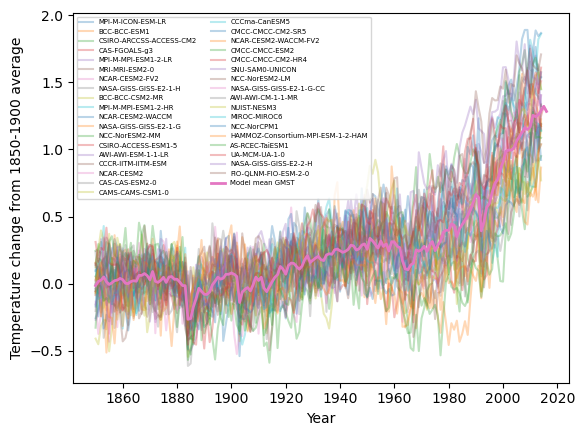

In [ ]:

for model in model_temps:
    plt.plot(model[0],model[1]-model[2],label=model[3],alpha=0.3)

plt.plot(mtimes,model_mean_diff,label="Model mean GMST",linewidth=2)
plt.ylabel("Temperature change from 1850-1900 average")
plt.xlabel("Year")
plt.legend(ncol=2,fontsize=5)